# Import Modules

In [25]:
import os
import pandas as pd
import numpy.random as rnd
from dotenv import load_dotenv
import requests
import warnings
import json
import sqlalchemy as sql
from pathlib import Path
import datetime
import yfinance as yf

from MCForecastTools import MCSimulation
warnings.filterwarnings('ignore')


%matplotlib inline

#warnings.filterwarnings("ignore")
#pd.options.display.float_format = '{:.4%}'.format

# Client Input Module

In [2]:
## Function to assess client risk profile
from clientprofile.client_risk_profile import client_risk_tolerance
client_risk = client_risk_tolerance()
print(f'Your risk factor is {client_risk}')
#type(client_risk)

A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 0


Please enter a valid input


A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 0


Please enter a valid input


A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 0


Please enter a valid input


A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 0


Please enter a valid input


A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 0


Please enter a valid input


A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 0


Please enter a valid input


A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 0


Please enter a valid input


A. On a scale of 1(Risky Avoidant) - 4(Risky), how would your closest friend describe your risk tolerance? 1
B. On a scale of 1(Risky Avoidant) - 4(Risky), how would you describe your risk tolerance? 1
C. What would you rather:1. Take $1,000 in cash  2. A 50% chance at winning $5,000  3. A 25% chance at winning $10,000  4. A 5% chance at winning $100,000   1
D. Define risk: 1. Loss 2. Uncertainty 3. Opportunity 4. Thrill  1
E. How comfortable on a scale of 1(Not Comfortable) - 4(Very Comfortable)are you with investing your money into stocks? 1


Your risk factor is 0.25


In [3]:
# print(client_risk)

In [4]:
#### Client input for their investment horizon. 
investment_timeframe = input("What is the desired timeframe(in # of years) for your investment?")
investment_timeframe = int(investment_timeframe)

What is the desired timeframe(in # of years) for your investment? 10


# Data Input for Universe (Multiple Asset Classes)

In [5]:
# Date range
today = datetime.date.today()
start_date = today - datetime.timedelta(days=365*5) #trading days(252) * amount of years to go back 

start = start_date.strftime("%Y-%m-%d")
end = today.strftime("%Y-%m-%d")

# Tickers of assets
assets = ["XLC", "XLY", "XLP", "XLE", "XLF", "XLV", "XLI", "XLB", "XLRE", "XLK", "XLU", "AAPL", "MSFT", "NVDA", "AMZN", "BRK-B",
         "GOOG", "META", "UNH", "XOM", "AGG", "BND", "LQD", "VCIT", "BNDX", "TMF", "TLT", "ICVT", "LKOR", "FBND"]
assets.sort()

# Downloading data
og_data = yf.download(assets, start = start, end = end)
data = og_data.loc[:,('Adj Close', slice(None))]
data.columns = assets

Y = data[assets].pct_change().dropna()

display(start)
display(end)
display(Y)

[*********************100%***********************]  30 of 30 completed


'2018-05-13'

'2023-05-12'

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2018-06-20,0.004362,-0.001887,0.008820,-0.002277,0.000183,-0.004465,-0.001637,0.001524,0.006898,-0.009009,...,0.004415,-0.002559,0.000683,0.002100,0.000979,0.010794,0.000797,0.002121,0.004741,-0.003098
2018-06-21,-0.005576,0.000284,-0.011348,0.000508,0.000366,-0.003377,0.000041,-0.010412,-0.009168,-0.001414,...,-0.018516,-0.002932,-0.012555,-0.007684,0.001956,0.005967,0.003385,-0.005762,-0.007123,-0.009447
2018-06-22,-0.002912,0.000945,-0.008409,0.000633,0.000183,0.000265,0.001189,-0.001883,-0.008748,-0.003035,...,0.019951,-0.004779,0.003455,-0.003238,0.008202,0.008742,0.006944,0.004494,-0.001704,0.021207
2018-06-25,-0.014871,-0.000566,-0.030612,-0.000126,-0.001644,-0.011540,0.000921,-0.026543,-0.014783,0.000000,...,-0.020093,-0.010713,-0.012670,-0.020763,0.005036,-0.002476,0.016552,-0.009184,-0.021739,-0.020152
2018-06-26,0.012406,0.001606,0.016799,0.001647,0.000000,-0.001553,0.000307,-0.005645,0.001395,0.005479,...,0.012629,-0.003361,0.003766,0.004039,-0.004240,0.005275,0.001163,-0.003090,0.007162,0.011286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-05,0.046927,-0.003201,0.015962,-0.003645,-0.003874,0.012125,-0.003247,0.009552,0.010905,-0.002298,...,0.027141,0.024723,0.015097,0.025078,0.009285,0.015460,0.006415,0.008988,0.020240,0.024896
2023-05-08,-0.000403,-0.005519,0.001609,-0.004743,-0.002252,0.006978,-0.004995,0.019065,0.004623,-0.011402,...,0.000000,0.001547,-0.003618,-0.000529,-0.002980,-0.006944,-0.003042,-0.002171,0.003397,0.003957
2023-05-09,-0.009971,-0.000908,0.007465,-0.001089,-0.000616,-0.003894,-0.000873,-0.002772,-0.000976,-0.000256,...,0.000374,-0.003706,0.002219,-0.007674,-0.003119,-0.003228,-0.001308,-0.006677,-0.000271,0.000275


In [6]:
display(og_data)

Adj Close                                               \
                  AAPL        AGG        AMZN        BND       BNDX   
Date                                                                  
2018-05-14   45.014751  93.800049   80.077003  69.335060  47.931133   
2018-05-15   44.605637  93.383186   78.806000  69.009605  47.834347   
2018-05-16   45.021935  93.276787   79.363998  68.956841  47.834347   
2018-05-17   44.737236  93.152588   79.087997  68.895248  47.790340   
2018-05-18   44.574535  93.392059   78.718498  69.079979  47.816727   
...                ...        ...         ...        ...        ...   
2023-05-05  173.570007  99.650002  105.660004  73.800003  48.849998   
2023-05-08  173.500000  99.099998  105.830002  73.449997  48.740002   
2023-05-09  171.770004  99.010002  106.620003  73.370003  48.709999   
2023-05-10  173.559998  99.650002  110.190002  73.820000  48.889999   
2023-05-11  173.750000  99.949997  112.180000  74.059998  49.090000   

                                                                     ...  \
                 BRK-B       FBND        GOOG       ICVT       LKOR  ...   
Date                                                                 ...   
2018-05-14  199.179993  41.936420   55.009998  47.381836  40.740223  ...   
2018-05-15  197.360001  41.738689   53.961498  47.349049  40.323181  ...   
2018-05-16  197.830002  41.781670   54.088501  47.603138  40.177696  ...   
2018-05-17  197.490005  41.730080   53.929501  47.496590  40.080700  ...   
2018-05-18  196.059998  41.764477   53.318001  47.429379  40.080700  ...   
...                ...        ...         ...        ...        ...  ...   
2023-05-05  323.880005  46.049999  106.214996  71.379997  43.415001  ...   
2023-05-08  326.140015  45.820000  108.239998  71.709999  42.919998  ...   
2023-05-09  324.869995  45.779999  107.940002  71.639999  42.909000  ...   
2023-05-10  322.989990  46.009998  112.279999  71.970001  43.299000  ...   
2023-05-11  322.640015  46.169998  116.900002  71.904999  43.610001  ...   

              Volume                                                   \
                 XLE       XLF       XLI       XLK       XLP     XLRE   
Date                                                                    
2018-05-14  10226300  31292900   5856600  10130900   6708100  1882900   
2018-05-15  10482700  54655800  10180500  14262600  22686900  2371100   
2018-05-16  11997200  31984900   6281300   6680500  12151300  1562100   
2018-05-17  16271300  45070400   7519500  10800100  19572900  1758200   
2018-05-18  14092700  33266100   7482900   7882900  15664700  1395300   
...              ...       ...       ...       ...       ...      ...   
2023-05-05  19533600  54989500   9231300   6114200  10479100  3265100   
2023-05-08  16355900  34323600   7610200   3397800   8069200  3358700   
2023-05-09  20710600  29736200   8068100   6236600   6939500  2995000   
2023-05-10  18026000  39706100  12580500   5275900  12259100  3770000   
2023-05-11  19080600  36686800  11573800   4478400  11790600  3419400   

                                                   
                 XLU       XLV      XLY       XOM  
Date                                               
2018-05-14   8512800  11837600  3324900  11852100  
2018-05-15  11070700   8806800  4558000  12595700  
2018-05-16  13541300   7013600  3239200   9570000  
2018-05-17  11276000   6610400  6364500  11224100  
2018-05-18  11810400   5838900  4108900  10030900  
...              ...       ...      ...       ...  
2023-05-05  11416600   7650300  3685900  14964700  
2023-05-08   8286700   5305700  3425000  11187800  
2023-05-09  10281100   6452700  4232500  11370800  
2023-05-10  10708300   6556600  4514000  14884800  
2023-05-11  14874100   8764800  4144300  17158800  

[1258 rows x 180 columns]

# Client Scaling Factor

This code was added to ensure that the calculation from the client had a risk aversion factor between 0 and 1, where 0 is highly risk adverse & 1 is low risk aversion. 

In [7]:
# Client fear factor scaling. necessary as porfolio optimization solution uses an logarithmic estimation
x = client_risk

if (x >= 0) and (x < 0.25):
    fear_factor = 10000
    print(f'Client risk aversion is: {fear_factor}')

elif (x >= 0.25) and (x < 0.5):
        fear_factor = 3500
        print(f'Client risk aversion is: {fear_factor}')
elif (x >= 0.5) and (x <= 0.75):
        fear_factor = 2.5
        print(f'Client risk aversion is: {fear_factor}')
else:
    if (x >= 0.75) and (x <= 1):
        fear_factor = 0
        print(f'Client risk aversion is: {fear_factor}')
    else:
        print(f"Number isn't between 0 and 1")
       

Client risk aversion is: 3500


# Portfolio Optimization using Risk Parity Model

In [8]:
import riskfolio as rp
#pd.options.display.float_format = '{:.4%}'.format

# Building the portfolio object
port = rp.Portfolio(returns=Y)

# Calculating optimal portfolio

# Select method and estimate input parameters:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

# Estimate optimal portfolio:
# Risk Measures available:
#
# 'MV': Standard Deviation.
# 'MAD': Mean Absolute Deviation.
# 'MSV': Semi Standard Deviation.
# 'FLPM': First Lower Partial Moment (Omega Ratio).
# 'SLPM': Second Lower Partial Moment (Sortino Ratio).
# 'CVaR': Conditional Value at Risk.
# 'EVaR': Entropic Value at Risk.
# 'CDaR': Conditional Drawdown at Risk of uncompounded cumulative returns.
# 'EDaR': Entropic Drawdown at Risk of uncompounded cumulative returns.
# 'UCI': Ulcer Index of uncompounded cumulative returns.

model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Utility' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = fear_factor # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,9.362614e-10,1.634170e-07,7.679595e-10,2.198320e-08,0.973501,1.242458e-08,4.148109e-09,1.043910e-09,2.244036e-09,4.251510e-10,...,1.763256e-09,0.007739,1.465406e-09,8.042298e-10,1.066766e-07,5.509537e-10,7.005448e-10,7.133977e-09,8.452207e-10,0.018759


# Optimal Portfolio

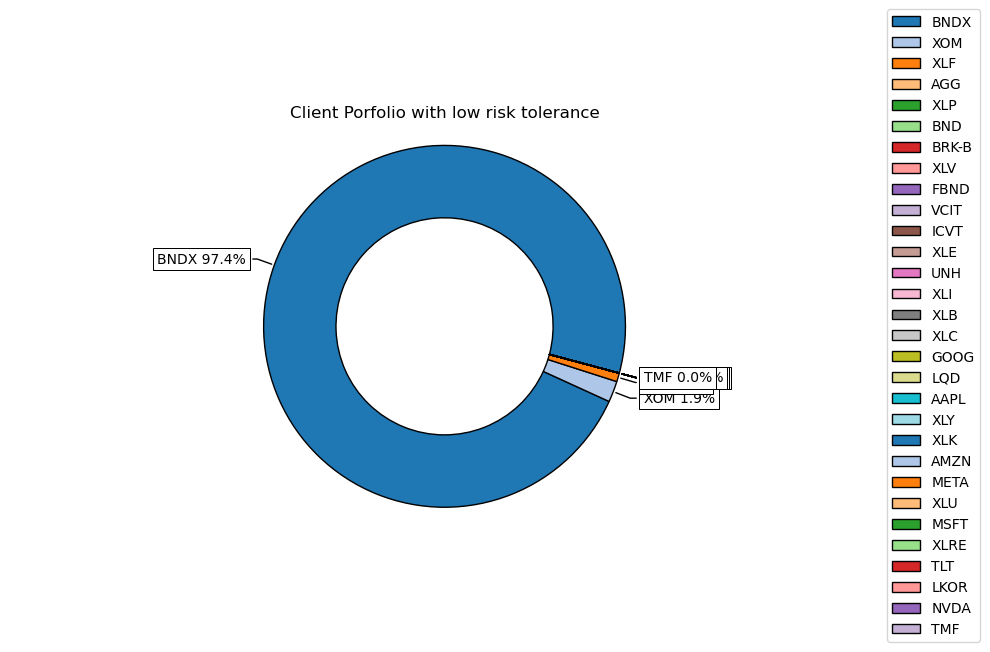

In [31]:
ax = rp.plot_pie(w=w, title='Client Porfolio with low risk tolerance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

# Code to print out image of results to share with client and include in readme file
#rp.get_figure().savefig('/images/Risk Avoidant Portfolio.png',bbox_inches = 'tight')

In [33]:
# Calculating the efficient frontier for the portfolio
points = 50 # Number of points of the frontier

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
0,1.777175e-09,2.695175e-07,1.501964e-09,3.915320e-08,0.973690,2.283541e-08,7.314613e-09,2.059943e-09,4.552097e-09,7.438961e-10,...,3.194500e-09,7.739189e-03,2.633662e-09,1.507009e-09,7.266272e-08,9.643989e-10,1.207928e-09,1.575861e-08,1.564866e-09,0.018570
1,5.441008e-02,1.548659e-01,2.209946e-10,1.307156e-08,0.702742,1.355361e-09,3.188729e-09,5.242042e-10,5.985145e-10,3.208948e-10,...,3.836314e-10,3.388115e-10,3.598710e-10,3.773537e-10,3.996455e-02,2.631278e-10,6.044279e-10,1.656488e-09,2.376428e-10,0.028324
2,7.812813e-02,2.259985e-01,1.192767e-10,7.180511e-09,0.577750,6.618444e-10,2.338896e-09,2.752369e-10,3.173912e-10,2.400128e-10,...,2.296572e-10,1.790129e-10,2.105047e-10,2.128559e-10,4.711484e-02,1.719943e-10,5.276069e-10,7.441628e-10,1.346628e-10,0.030433
3,9.850557e-02,2.871591e-01,9.016236e-12,6.327698e-10,0.470294,5.079488e-11,2.067475e-10,2.113754e-11,2.414559e-11,2.121971e-11,...,1.784289e-11,1.350506e-11,1.635985e-11,1.612174e-11,5.327513e-02,1.408611e-11,5.119735e-11,5.539543e-11,1.033274e-11,0.032246
4,1.169809e-01,3.168659e-01,3.294401e-10,2.439425e-08,0.382687,1.817730e-09,8.794143e-09,7.581356e-10,8.711002e-10,8.561049e-10,...,6.621994e-10,4.887189e-10,6.039731e-10,5.912677e-10,6.058595e-02,5.378189e-10,2.186797e-09,1.951872e-09,3.812459e-10,0.035190


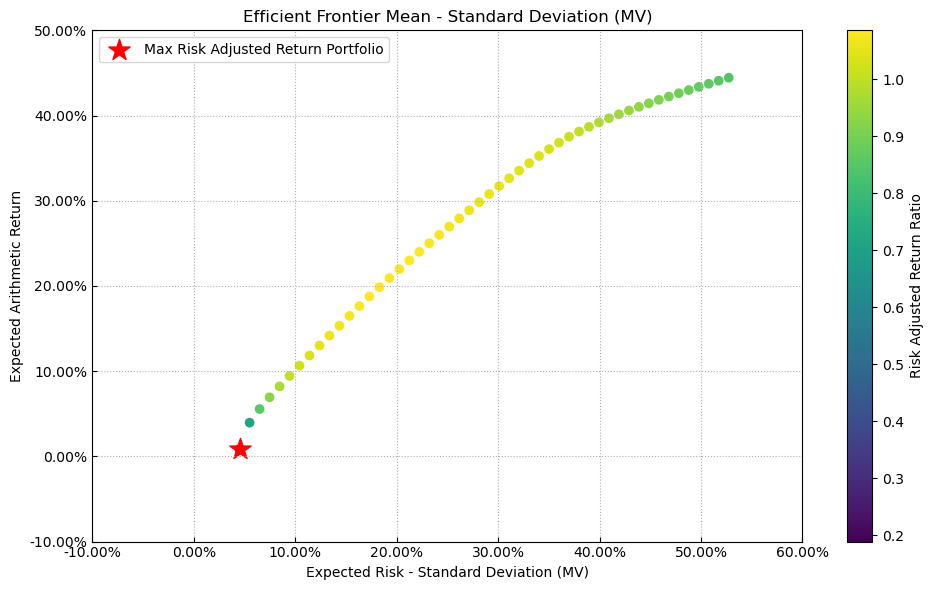

In [34]:
label = 'Max Risk Adjusted Return Portfolio'
mu = port.mu
cov = port.cov
returns = port.returns

ax = rp.plot_frontier(w_frontier=frontier,
                      mu=mu,
                      cov=cov,
                      returns=returns,
                      rm=rm,
                      rf=0,
                      alpha=0.05,
                      cmap='viridis',
                      w=w,
                      label=label,
                      marker='*',
                      s=16,
                      c='r',
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

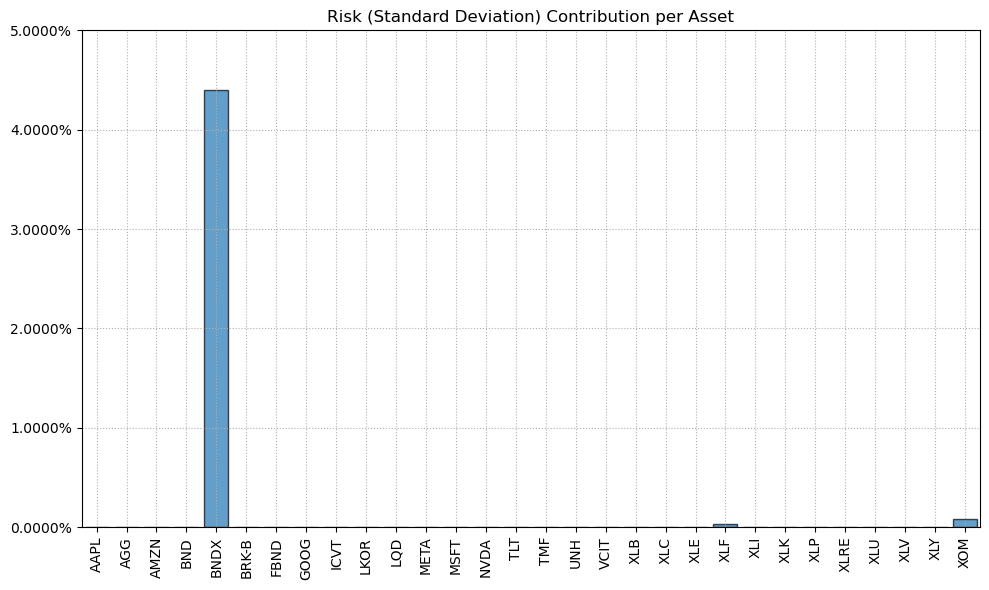

In [10]:
ax = rp.plot_risk_con(w, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

In [11]:
# used to save weights to a csv file
#w.to_csv(Path("w.csv"))

# Portfolio Optimization (Assuming uniformly distributed risk across all assets)

Special case of risk parity (vanilla risk parity where risk is equally weighted across all assets) 

In [12]:
# Risk parity porfolio assuming that risk is eqaully distributed, where 'b' which is a constraint variable is set to none
b = None # Risk contribution constraints vector

w_rp = port.rp_optimization(model=model, rm=rm, rf=rf, b=b, hist=hist)

display(w.T)

,AAPL,AGG,AMZN,BND,BNDX,BRK-B,FBND,GOOG,ICVT,LKOR,...,XLE,XLF,XLI,XLK,XLP,XLRE,XLU,XLV,XLY,XOM
weights,9.362614e-10,1.634170e-07,7.679595e-10,2.198320e-08,0.973501,1.242458e-08,4.148109e-09,1.043910e-09,2.244036e-09,4.251510e-10,...,1.763256e-09,0.007739,1.465406e-09,8.042298e-10,1.066766e-07,5.509537e-10,7.005448e-10,7.133977e-09,8.452207e-10,0.018759


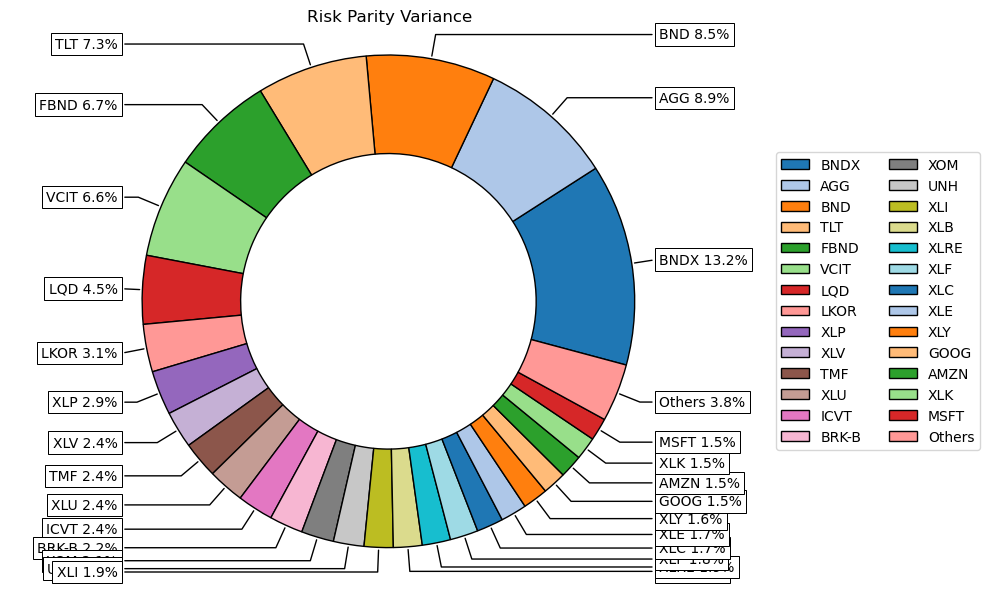

In [13]:
ax = rp.plot_pie(w=w_rp, title='Risk Parity Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)

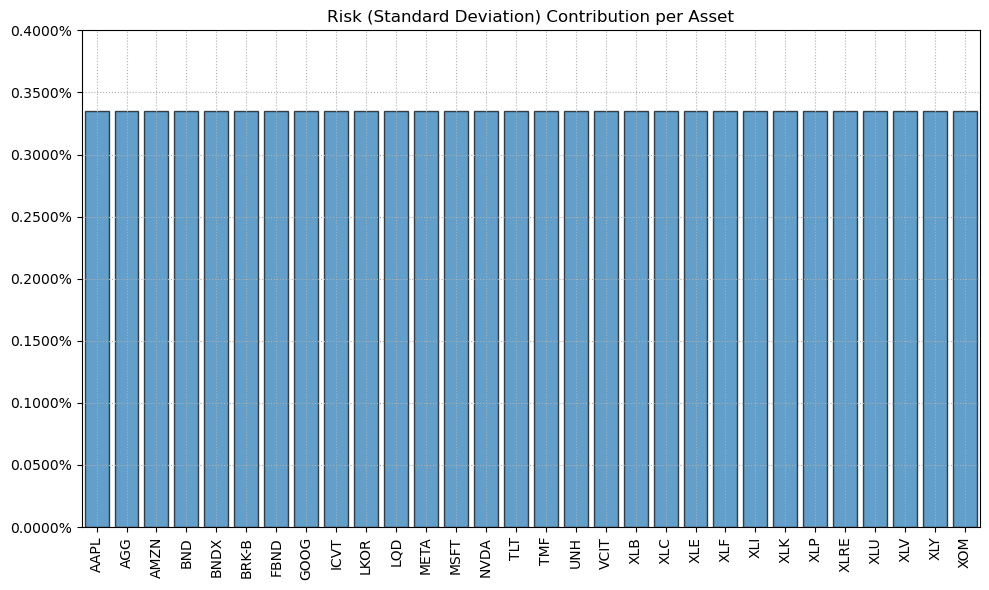

In [14]:
ax = rp.plot_risk_con(w_rp, cov=port.cov, returns=port.returns, rm=rm, rf=0, alpha=0.01,
                      color="tab:blue", height=6, width=10, ax=None)

# Monte Carlo Simulation

In [15]:
#using the weight 'w' from the optimal portfolio as the weights to simulate the projected returns from the portfolio


#portfolio_path = Path("w.csv")
#portfolio_df = pd.read_csv(portfolio_path)
#display(w)

# Monte Carlo simulation is on the optimal portfolio
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

portfolio_df = w
portfolio_df = portfolio_df.reset_index()
portfolios_headers = ["Ticker", "Weight"]
portfolio_df.columns = portfolios_headers
portfolio_df['Weight'] = portfolio_df['Weight'].apply(lambda x: "{:.10f}".format(x))
portfolio_df['Weight'] = portfolio_df['Weight'].astype(float)
portfolio_df.head()

,Ticker,Weight
0,AAPL,9.000000e-10
1,AGG,1.634000e-07
2,AMZN,8.000000e-10
3,BND,2.200000e-08
4,BNDX,9.735010e-01


In [16]:
#Creating lists of tickers and weights to be used in the Monte Carlo simulation

tickers = portfolio_df["Ticker"].tolist()
weights_list = portfolio_df["Weight"].tolist()
weights_list

# test to ensure weights are float
#for i in weights_list:
   # print(type(i))
    

[9e-10,
 1.634e-07,
 8e-10,
 2.2e-08,
 0.9735010407,
 1.24e-08,
 4.1e-09,
 1e-09,
 2.2e-09,
 4e-10,
 1e-09,
 7e-10,
 7e-10,
 4e-10,
 5e-10,
 1e-10,
 1.5e-09,
 3.7e-09,
 1.5e-09,
 1.2e-09,
 1.8e-09,
 0.0077394811,
 1.5e-09,
 8e-10,
 1.067e-07,
 6e-10,
 7e-10,
 7.1e-09,
 8e-10,
 0.0187591397]

In [17]:
#Getting the open, close and daily return for the tickers in the portfolio and creating a dataframe with the data

dfs = []

for ticker in tickers:
    data = yf.download(ticker, start, interval='1d')
    open_df = pd.DataFrame(data['Open']).rename(columns={'Open': 'open'})
    adj_close_df = pd.DataFrame(data['Adj Close']).rename(columns={'Adj Close': 'close'})
    daily_return_df = pd.DataFrame(data['Adj Close'].pct_change()).rename(columns={'Adj Close': 'daily_return'})
    dfs.append(pd.concat([open_df, adj_close_df, daily_return_df], axis=1, keys=[ticker]*3))

data = pd.concat(dfs, axis=1).dropna()
data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

AAPL                                  AGG             \
                  open       close daily_return        open      close   
Date                                                                     
2018-06-20   46.587502   44.620003     0.004362  106.059998  94.064400   
2018-06-21   46.812500   44.371174    -0.005577  105.879997  94.091064   
2018-06-22   46.529999   44.241974    -0.002912  105.820000  94.179970   
2018-06-25   45.849998   43.584045    -0.014871  105.949997  94.126640   
2018-06-26   45.747501   44.124744     0.012406  105.989998  94.277756   
...                ...         ...          ...         ...        ...   
2023-05-08  172.479996  173.500000    -0.000403   99.209999  99.099998   
2023-05-09  173.050003  171.770004    -0.009971   99.110001  99.010002   
2023-05-10  173.020004  173.559998     0.010421   99.430000  99.650002   
2023-05-11  173.850006  173.750000     0.001095  100.110001  99.949997   
2023-05-12  173.619995  171.320007    -0.013986   99.889999  99.526398   

                               AMZN                                 BND  ...  \
           daily_return        open       close daily_return       open  ...   
Date                                                                     ...   
2018-06-20    -0.001886   87.125000   87.503998     0.008820  79.050003  ...   
2018-06-21     0.000283   88.000000   86.511002    -0.011348  78.930000  ...   
2018-06-22     0.000945   87.130997   85.783501    -0.008409  78.919998  ...   
2018-06-25    -0.000566   85.125504   83.157501    -0.030612  79.000000  ...   
2018-06-26     0.001605   83.618500   84.554497     0.016799  79.000000  ...   
...                 ...         ...         ...          ...        ...  ...   
2023-05-08    -0.005519  105.040001  105.830002     0.001609  73.500000  ...   
2023-05-09    -0.000908  105.480003  106.620003     0.007465  73.430000  ...   
2023-05-10     0.006464  108.099998  110.190002     0.033483  73.680000  ...   
2023-05-11     0.003010  111.029999  112.180000     0.018060  74.180000  ...   
2023-05-12    -0.004238  112.160004  109.680000    -0.022286  74.010002  ...   

                    XLU         XLV                                  XLY  \
           daily_return        open       close daily_return        open   
Date                                                                       
2018-06-20     0.000797   84.970001   78.318886     0.002121  112.360001   
2018-06-21     0.003385   84.959999   77.867615    -0.005762  112.470001   
2018-06-22     0.006944   84.860001   78.217575     0.004494  112.000000   
2018-06-25     0.016552   84.610001   77.499229    -0.009184  110.860001   
2018-06-26     0.001163   84.220001   77.259781    -0.003090  109.309998   
...                 ...         ...         ...          ...         ...   
2023-05-08    -0.003042  133.389999  133.300003    -0.002171  147.639999   
2023-05-09    -0.001308  132.789993  132.410004    -0.006677  146.880005   
2023-05-10     0.009166  132.789993  132.779999     0.002794  149.009995   
2023-05-11    -0.010236  132.500000  132.369995    -0.003088  148.490005   
2023-05-12     0.000728  132.570007  131.770004    -0.004533  149.600006   

                                            XOM                           
                 close daily_return        open       close daily_return  
Date                                                                      
2018-06-20  106.909904     0.004741   80.849998   62.641468    -0.003098  
2018-06-21  106.148392    -0.007123   80.019997   62.049702    -0.009447  
2018-06-22  105.967506    -0.001704   81.160004   63.365593     0.021207  
2018-06-25  103.663864    -0.021739   80.779999   62.088615    -0.020153  
2018-06-26  104.406380     0.007163   80.150002   62.789402     0.011287  
...                ...          ...         ...         ...          ...  
2023-05-08  147.690002     0.003397  110.500000  109.110001     0.003957  
2023-05-09  147.649994    -0.000271  108.3399

In [18]:
#setting the inputs for the Monte Carlo simulation

thirty_year_simulation = MCSimulation(
    portfolio_data=data,
    weights=weights_list,   
    num_simulation=40,
    num_trading_days=252*investment_timeframe
)


thirty_year_simulation.portfolio_data.head()


AAPL                                 AGG             \
                 open      close daily_return        open      close   
Date                                                                   
2018-06-20  46.587502  44.620003     0.004362  106.059998  94.064400   
2018-06-21  46.812500  44.371174    -0.005577  105.879997  94.091064   
2018-06-22  46.529999  44.241974    -0.002912  105.820000  94.179970   
2018-06-25  45.849998  43.584045    -0.014871  105.949997  94.126640   
2018-06-26  45.747501  44.124744     0.012406  105.989998  94.277756   

                              AMZN                                BND  ...  \
           daily_return       open      close daily_return       open  ...   
Date                                                                   ...   
2018-06-20    -0.001886  87.125000  87.503998     0.008820  79.050003  ...   
2018-06-21     0.000283  88.000000  86.511002    -0.011348  78.930000  ...   
2018-06-22     0.000945  87.130997  85.783501    -0.008409  78.919998  ...   
2018-06-25    -0.000566  85.125504  83.157501    -0.030612  79.000000  ...   
2018-06-26     0.001605  83.618500  84.554497     0.016799  79.000000  ...   

                    XLU        XLV                                 XLY  \
           daily_return       open      close daily_return        open   
Date                                                                     
2018-06-20     0.000797  84.970001  78.318886     0.002121  112.360001   
2018-06-21     0.003385  84.959999  77.867615    -0.005762  112.470001   
2018-06-22     0.006944  84.860001  78.217575     0.004494  112.000000   
2018-06-25     0.016552  84.610001  77.499229    -0.009184  110.860001   
2018-06-26     0.001163  84.220001  77.259781    -0.003090  109.309998   

                                           XOM                          
                 close daily_return       open      close daily_return  
Date                                                                    
2018-06-20  106.909904     0.004741  80.849998  62.641468    -0.003098  
2018-06-21  106.148392    -0.007123  80.019997  62.049702    -0.009447  
2018-06-22  105.967506    -0.001704  81.160004  63.365593     0.021207  
2018-06-25  103.663864    -0.021739  80.779999  62.088615    -0.020153  
2018-06-26  104.406380     0.007163  80.150002  62.789402     0.011287  

[5 rows x 90 columns]

In [19]:
thirty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000054,1.002458,0.998588,0.995940,1.002529,1.001548,1.001592,0.999883,1.002954,1.001914,...,1.000672,1.002437,0.999706,0.999326,1.000245,0.999517,0.999391,1.001591,0.998438,1.001329
2,1.001920,0.999553,0.999714,0.993247,1.004455,1.000903,1.002328,0.996614,1.003809,1.005738,...,1.002037,1.004212,0.997321,1.002234,0.996598,1.002089,0.999167,1.002969,0.994723,1.002009
3,1.004980,1.004703,1.002286,0.997173,1.005719,1.000913,0.999265,1.002865,1.005444,1.002465,...,1.002470,1.004059,0.992735,0.999806,0.997996,1.004787,0.997176,1.000098,0.995324,1.001906
4,1.009574,1.001494,0.997732,0.995867,1.008783,1.000990,1.005130,1.000530,1.010531,1.002177,...,1.000688,1.006661,0.990643,0.995105,0.995791,1.000030,0.998789,1.000612,0.993625,1.001678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.781920,1.284775,1.031584,0.806908,1.085624,0.926962,1.081300,1.129672,0.776788,0.653165,...,1.339910,1.079512,0.988626,1.170714,1.152699,1.059031,1.152455,1.138873,0.904166,1.189320
2517,0.791378,1.294029,1.029881,0.802846,1.081309,0.925892,1.077711,1.132740,0.775938,0.654338,...,1.344437,1.075581,0.989807,1.166321,1.149688,1.064353,1.153209,1.136927,0.902927,1.189931
2518,0.794294,1.291938,1.026980,0.806478,1.083084,0.927887,1.074516,1.130391,0.776193,0.655149,...,1.341911,1.075303,0.985440,1.173059,1.148662,1.064301,1.150833,1.136192,0.902523,1.185488
2519,0.792773,1.289813,1.030490,0.807283,1.080974,0.925892,1.067362,1.127783,0.773590,0.656317,...,1.338685,1.073137,0.980353,1.174840,1.147722,1.065856,1.151061,1.142772,0.905077,1.180962


<AxesSubplot:title={'center':'40 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

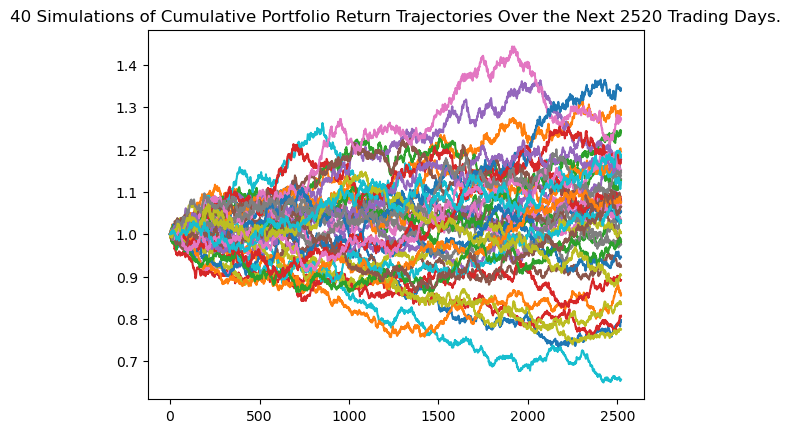

In [20]:
thirty_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 40 Simulations'}, ylabel='Frequency'>

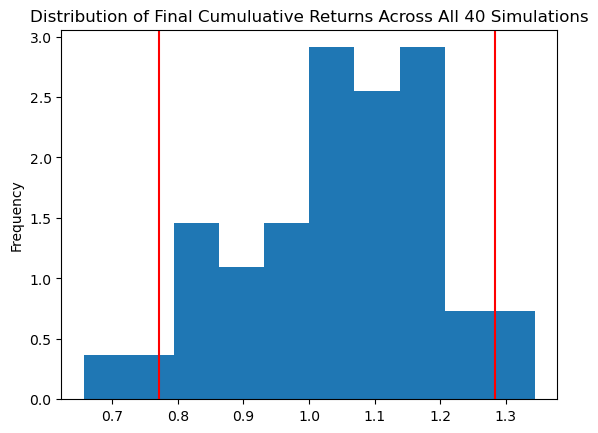

In [21]:
thirty_year_simulation.plot_distribution()

In [22]:
thirty_year_simulation_statistics = thirty_year_simulation.summarize_cumulative_return()
thirty_year_simulation_statistics

count           40.000000
mean             1.045116
std              0.150758
min              0.657029
25%              0.967772
50%              1.065652
75%              1.148253
max              1.344065
95% CI Lower     0.771841
95% CI Upper     1.283689
Name: 2520, dtype: float64